In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
from skimage.transform import rescale, resize, rotate
from skimage.color import rgb2gray
from image_handler import ImageHandler

import warnings
warnings.filterwarnings("ignore")

random_state = 42

# For reproducibility
np.random.seed(random_state)

In [2]:
data = pd.read_csv('./data/bee_data.csv')

## Cleaning data

In [3]:
health_counts = data["health"].value_counts()
target_categories = [name for name in health_counts.index if "varr" in name.lower() or "health" in name.lower()]
data = data[[status in target_categories for status in data["health"]]]
data["has_varroa"] = (data["health"] != "healthy").astype(int)
data = data[["file","has_varroa"]]

In [4]:
data.head()

,file,has_varroa
74,017_029.png,0
75,017_015.png,0
76,017_001.png,0
77,017_000.png,0
78,017_014.png,0


In [5]:
def get_image_data(files):
    IMAGE_FILE_ROOT = './data/bee_imgs/' 
    return np.asanyarray([imageio.imread("{}{}".format(IMAGE_FILE_ROOT, file)) for file in files])

In [6]:
def show_image(image, ax = plt, title = None, cmap = None):
    ax.imshow(image, cmap = cmap)
    ax.tick_params(bottom = False, left = False, labelbottom = False, labelleft = False)

In [7]:
raw_images = get_image_data(data["file"].iloc[:10].values)

In [8]:
img_store = ImageHandler(raw_images)

In [9]:
resizing = (54,50)

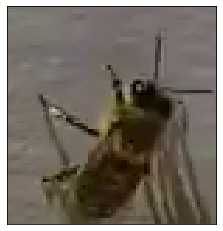

In [10]:
show_image(raw_images[0])

In [11]:
x = img_store.transform(resize = resizing,rotate=True, invert=True)

In [12]:
x.images.shape

(160, 54, 50, 3)

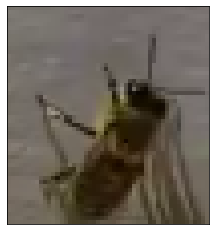

In [13]:
show_image(x.images_for_display[0])